<a href="https://colab.research.google.com/github/AguiarCamile/Trabalhos_IA/blob/main/Atividade_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Atividade 2 - Z-score e binominal distribution**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Bibliotecas

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

**Parte A**

Carregamento do dataset

In [4]:
file_path = "/content/drive/MyDrive/IA/data.csv"
df = pd.read_csv(file_path)

# exibir todas as colunas e suas primeiras linhas
print("Prévia dos dados:")
print(df.head())

Prévia dos dados:
         filename       tempo  beats  chroma_stft      rmse  \
0  blues.00081.au  103.359375     50     0.380260  0.248262   
1  blues.00022.au   95.703125     44     0.306451  0.113475   
2  blues.00031.au  151.999081     75     0.253487  0.151571   
3  blues.00012.au  184.570312     91     0.269320  0.119072   
4  blues.00056.au  161.499023     74     0.391059  0.137728   

   spectral_centroid  spectral_bandwidth      rolloff  zero_crossing_rate  \
0        2116.942959         1956.611056  4196.107960            0.127272   
1        1156.070496         1497.668176  2170.053545            0.058613   
2        1331.073970         1973.643437  2900.174130            0.042967   
3        1361.045467         1567.804596  2739.625101            0.069124   
4        1811.076084         2052.332563  3927.809582            0.075480   

        mfcc1  ...     mfcc12     mfcc13    mfcc14    mfcc15    mfcc16  \
0  -26.929785  ...  14.336612 -13.821769  7.562789 -6.181372  0.33

*Contexto dos dados*

Contexto
O dataset utilizado foi extraido da base kaggle e pode ser encontrado a partir do link: https://www.kaggle.com/datasets/insiyeah/musicfeatures

Essa base tem como principal classe a caracteristica/dimensão denominada "label", que contém o genero musical.
Um gênero musical é uma categoria convencional que identifica peças musicais como pertencentes a uma tradição compartilhada ou conjunto de convenções. Deve ser distinguido da forma musical e do estilo musical. As características extraídas dessas ondas podem ajudar a máquina a distingui-las.

Essa será a classe trabalhada na Parte A desse trabalho.

Além disso, tem várias features como spectral_centroid, beats, tempo, zero_crossing_rate e outras, que são importantes para a identificação e caracterização do genero musical.


As features que serão trabalhadas nesta Parte A, serão:


beats: refere-se aos ritmos ou batidas que formam o padrão rítmico de uma canção.

zero_crossing_rate: é a medida que quantifica a frequência com que um sinal atravessa o eixo zero, ou seja, muda de sinal (de positivo para negativo ou vice-versa) num determinado intervalo de tempo

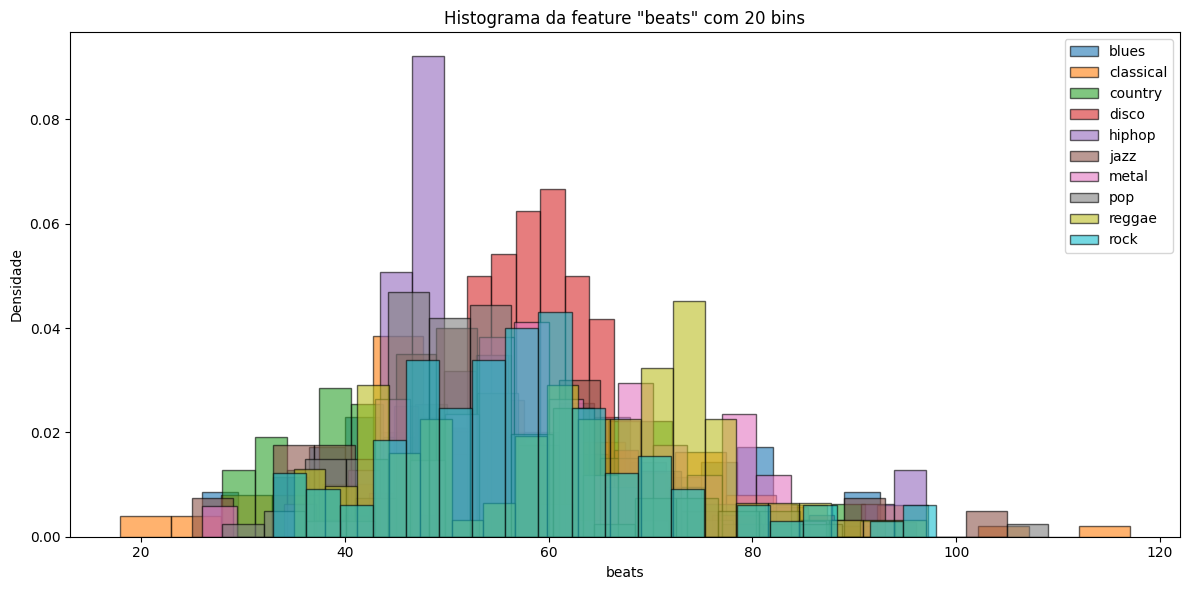

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Escolha da feature e dos bins
feature = 'beats'
bins = 20

# Classes presentes no dataset
classes = df['label'].unique()

# Criar o histograma com matplotlib
plt.figure(figsize=(12, 6))

for genre in classes:
    subset = df[df['label'] == genre][feature]
    plt.hist(subset, bins=bins, alpha=0.6, label=genre, density=True, edgecolor='black')

plt.title(f'Histograma da feature "{feature}" com {bins} bins')
plt.xlabel(feature)
plt.ylabel('Densidade')
plt.legend()
plt.tight_layout()
plt.show()

Com esse histograma, não consegue-se obter muitas informações sobre, devido a quantidade de generos musicais existentes, portanto, é necessário fazer uma filtragem no "label" para retornar apenas 2 generos, para possibilitar uma análise real.

PAra isso, selecionei o genero "rock" e "classical", por serem generos distintos para avaliar como eles se comportam de acordo com as features selecionadas.

In [6]:
# filtro
df_filtered = df[df['label'].isin(['rock', 'classical'])]

Agora pode ser criado o histograma para as features selecionadas

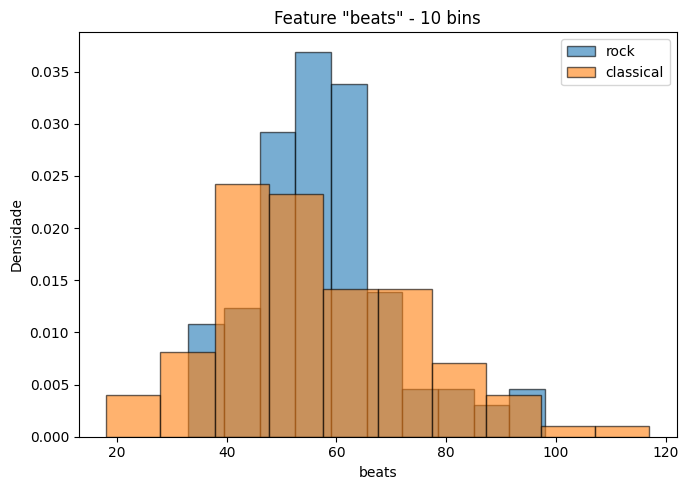

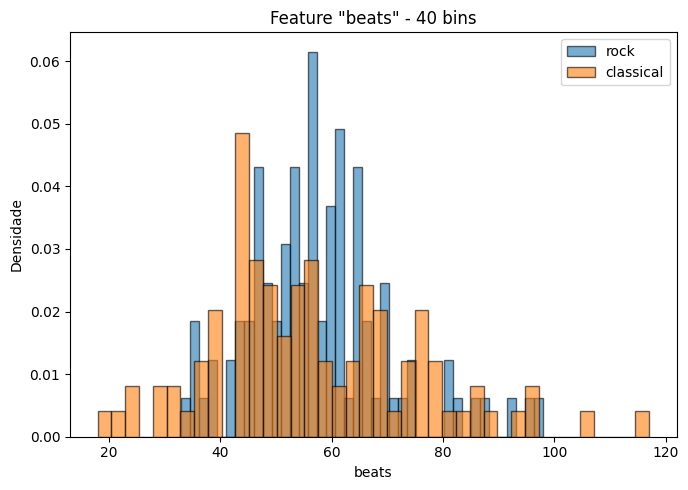

In [7]:
# Parâmetros
feature = 'beats'
classes = ['rock', 'classical']
bins_list = [10, 40]

# Histogramas para 'beats'
for bins in bins_list:
    plt.figure(figsize=(7, 5))

    for genre in classes:
        data = df_filtered[df_filtered['label'] == genre][feature]
        plt.hist(data, bins=bins, alpha=0.6, label=genre, density=True, edgecolor='black')

    plt.title(f'Feature "{feature}" - {bins} bins')
    plt.xlabel(feature)
    plt.ylabel('Densidade')
    plt.legend()
    plt.grid(False)
    plt.tight_layout()
    plt.show()

Discussão:


A análise da feature beats, relacionada à quantidade de batidas detectadas nas músicas, mostrou diferenças interessantes entre os gêneros "rock" e "classical". Os dois generos apresentam uma distribuição normal, porém o "rock" tende a ter mais batidas concentradas entre 40 beats a 80, enquanto o "classical" que apresenta uma concentração maior em faixas diferentes com menos batidas, assim ficando mais distribuida.

Por isso, o pico do "rock" é mais reduzido e mais alto, enquanto o "classical" é mais espaçado, nas duas quantidade de bins.

Com 10 bins, é melhor para visualizar, porque a partir dele a gente já consegue visualizar esse padrão e o histograma não fica tão ruidoso, quanto com 40 bins.


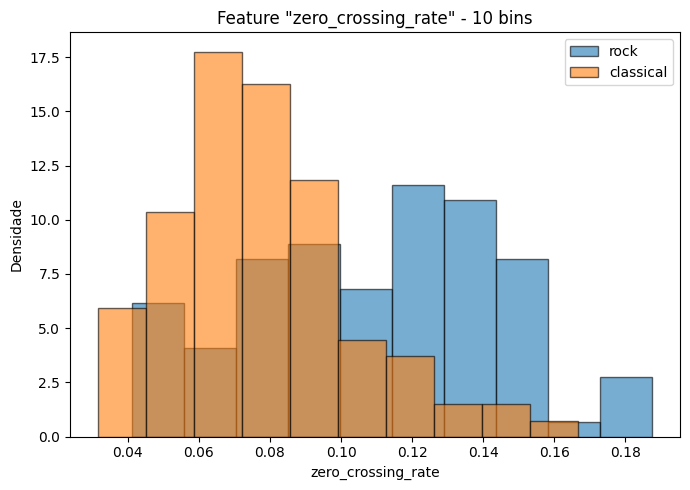

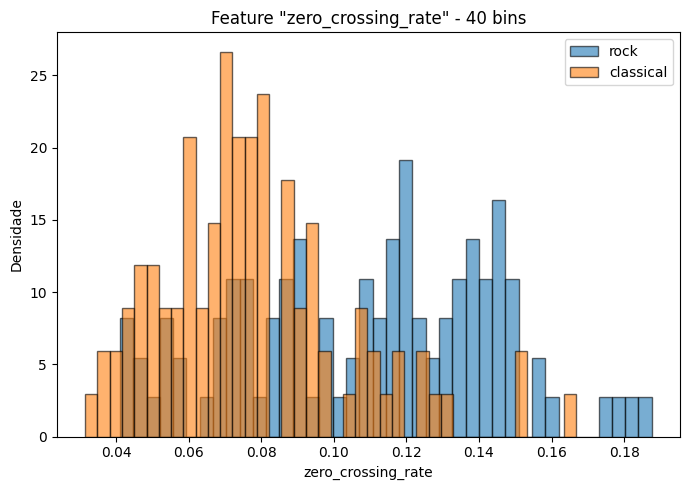

In [8]:
# Parâmetros
feature = 'zero_crossing_rate'
bins_list = [10, 40]

# Histogramas para 'zero_crossing_rate'
for bins in bins_list:
    plt.figure(figsize=(7, 5))

    for genre in classes:
        data = df_filtered[df_filtered['label'] == genre][feature]
        plt.hist(data, bins=bins, alpha=0.6, label=genre, density=True, edgecolor='black')

    plt.title(f'Feature "{feature}" - {bins} bins')
    plt.xlabel(feature)
    plt.ylabel('Densidade')
    plt.legend()
    plt.grid(False)
    plt.tight_layout()
    plt.show()

Discussão:


Ao analisar os histogramas, percebemos que músicas do gênero "rock" possuem uma taxa de cruzamento mais alta, com concentração em faixas médias e altas, enquanto o gênero "classical" tende a ter valores mais baixos, indicando um som mais suave e contínuo.

Com 10 bins, é ótimo para ver que "rock" e "classical" tem caracteristicas distintas. Com 40 bins fica muito ruidoso que pode dificultar um pouco a visualização.

**Parte B**

Para a parte B deste trabalho, eu defini o tempo para ser o experimento.

Bibliotecas

In [9]:
import numpy as np
from scipy.stats import norm

In [51]:
tempo = df['tempo'].values

# média e do desvio padrão
media_tempo = np.mean(tempo)
desvio_tempo = np.std(tempo)

print(f"Média do tempo: {media_tempo:.2f}")
print(f"Desvio padrão do tempo: {desvio_tempo:.2f}")

# Gerando dados artificiais baseados em distribuição normal
np.random.seed(1)  # para resultados reproduzíveis
tempo_artificial = np.random.normal(loc=media_tempo, scale=desvio_tempo, size=1000)

print(f"Média dos dados artificiais: {np.mean(tempo_artificial):.2f}")
print(f"Desvio padrão dos dados artificiais: {np.std(tempo_artificial):.2f}")

Média do tempo: 119.60
Desvio padrão do tempo: 28.28
Média dos dados artificiais: 120.70
Desvio padrão dos dados artificiais: 27.75


A partir da média e do desvio padrão pode ser visto que os dados artificiais criados se assemelham muito aos dados reais.

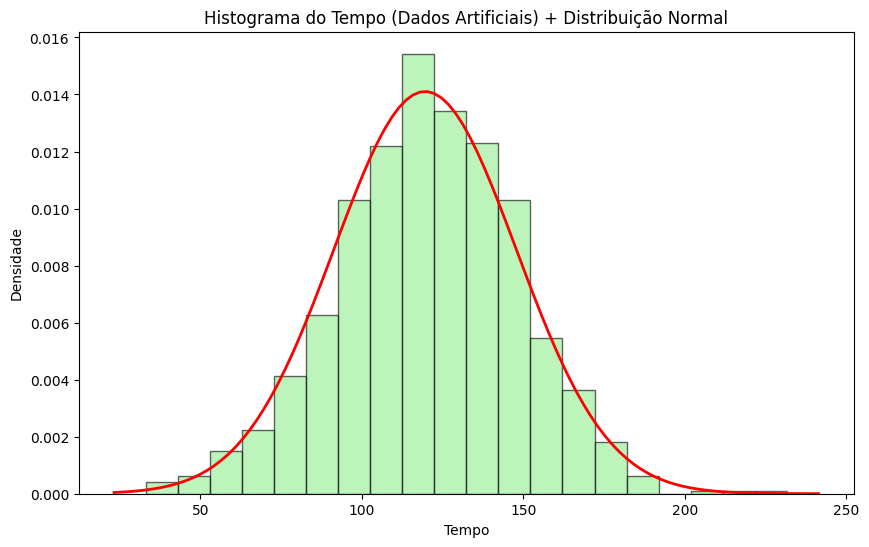

In [70]:
# Plotando o histograma dos dados artificiais
plt.figure(figsize=(10,6))
plt.hist(tempo_artificial, bins=20, density=True, alpha=0.6, color='lightgreen', edgecolor='black')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, media, desvio)
plt.plot(x, p, 'r', linewidth=2)

plt.title('Histograma do Tempo (Dados Artificiais) + Distribuição Normal')
plt.xlabel('Tempo')
plt.ylabel('Densidade')
plt.grid(False)
plt.show()

In [66]:
# Cálculo na versão não padronizada
nao_padronizada = norm.cdf(90, loc=media, scale=desvio)
print(f"O calculo na versão não padronizada resulta: {nao_padronizada}")

# Cálculo na versão padronizada
z = (90 - media) / desvio
print(f"O valor do z-score resulta: {z}")

O calculo na versão não padronizada resulta: 0.14763806303702448
O valor do z-score resulta: -1.0466172861236958


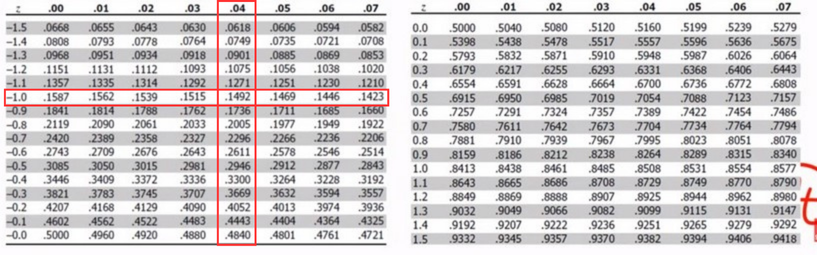

Em que a partir do valor do z-score podemos ver que o valor obtido é 0.1492, de acordo com as informações da tabela, um valor bem proximo do encontrado na versão nao padronizada.

**Parte C**

Biblioteca

In [ ]:
from scipy.stats import norm

In [90]:
s = 0.95
n = 10
k = 8

# Calcula a probabilidade binomial
probabilidade = scipy.stats.binom.pmf(k, n, s)

print(f"Probabilidade de {k} sucessos em {n} tentativas: {probabilidade:.4f}")


Probabilidade de 8 sucessos em 10 tentativas: 0.0746


In [91]:
s = 0.8
n = 10
k = 8

# Calcula a probabilidade binomial
probabilidade = scipy.stats.binom.pmf(k, n, s)

print(f"Probabilidade de {k} sucessos em {n} tentativas: {probabilidade:.4f}")


Probabilidade de 8 sucessos em 10 tentativas: 0.3020


Discussão:

O s=0.95 é tão provavel dar 10 ou 9, a amostragem sendo de 10, que para ter 8 sucessos acaba se tornando pouco improvavel que o s=0.8. Isso significa que quanto mais perto do valor esperado, maior a probabilidade.

Amostras (número de sucessos em cada experimento):
[ 8  9  8 10  9  9  8  8  7  6]


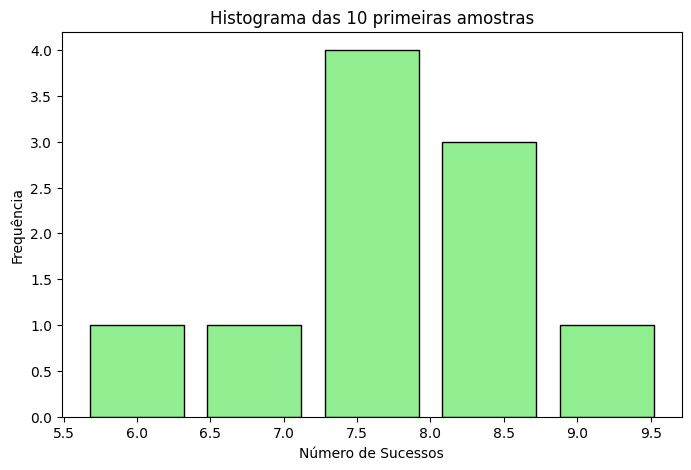

In [127]:
amostras = scipy.stats.binom.rvs(n, p, size=10)

print("Amostras (número de sucessos em cada experimento):")
print(amostras)

# Plotar o histograma
plt.figure(figsize=(8,5))
plt.hist(amostras, bins=5, align='left', rwidth=0.8, color='lightgreen', edgecolor='black')
plt.title('Histograma das 10 primeiras amostras')
plt.xlabel('Número de Sucessos')
plt.ylabel('Frequência')
plt.show()

Conforme o histograma do numero de sucesso das 10 amostras, percebeu-se que aos poucos ele se direciona para uma ditribuição normal, e que com uma maior quantidade de amostras tem alta probabilidade de que a quantidade de sucessos se distribua dessa forma e seja cada vez mais perceptivel.